This notebook is used for exploratory data analysis, make sure you use the cleaned dataset from the "data_cleaning" folder in the repo.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
sns.set(rc = {'figure.figsize':(10,6)})

In [46]:
df = pd.read_csv('/content/Heart Diseases Clean Grouped Last.csv')
df_corr = pd.read_csv('/content/Heart Diseases Clean Normal.csv')
display(df.head(3))

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholestrol,Fasting Blood Pressure > 120mg/dl,Rest ECG,Maximum Heart Rate,Exercise Induced Angina,Exercise Induced ST Depression,Slope,Number of Major Vessels,Thalassemia,Outcome
0,63.0,Male,Typical Angina,145,233,True,Abnormal,150,No,2.3,Downsloping,0,6,No Heart Disease
1,67.0,Male,Asymptomatic,160,286,False,Abnormal,108,Yes,1.5,Flat,3,3,Heart Disease
2,67.0,Male,Asymptomatic,120,229,False,Abnormal,129,Yes,2.6,Flat,2,7,Heart Disease


Numerical variables are age, restbps, chol, thalack, and oldpeak

#Heat Map and Pair Grid

##Pearson correlation

Both pearson and spearman correlations are similar, so we can consider the correlation between the numerical and rank variables viable.

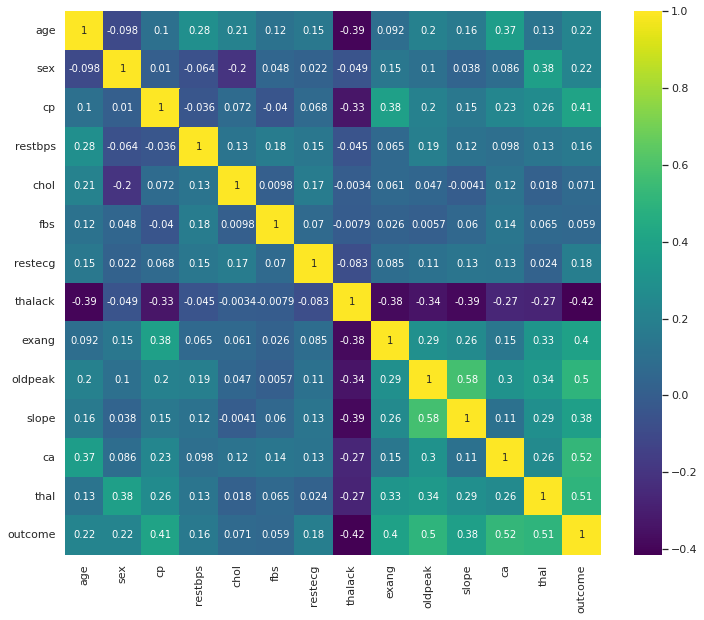

In [10]:
plt.figure(figsize = (12,10))
corr = df_corr.corr()
sns.heatmap(corr, annot = True, cmap = 'viridis')

In [25]:
c = df_corr.loc[:, df_corr.columns != 'outcome'].corr()
s = c.unstack()
so = pd.DataFrame(s.sort_values(kind="quicksort"))
display(so)

0
age     thalack -0.393806
thalack age     -0.393806
        slope   -0.385601
slope   thalack -0.385601
exang   thalack -0.378103
...                   ...
restbps restbps  1.000000
cp      cp       1.000000
sex     sex      1.000000
ca      ca       1.000000
thal    thal     1.000000

[169 rows x 1 columns]

##Spearman correlation

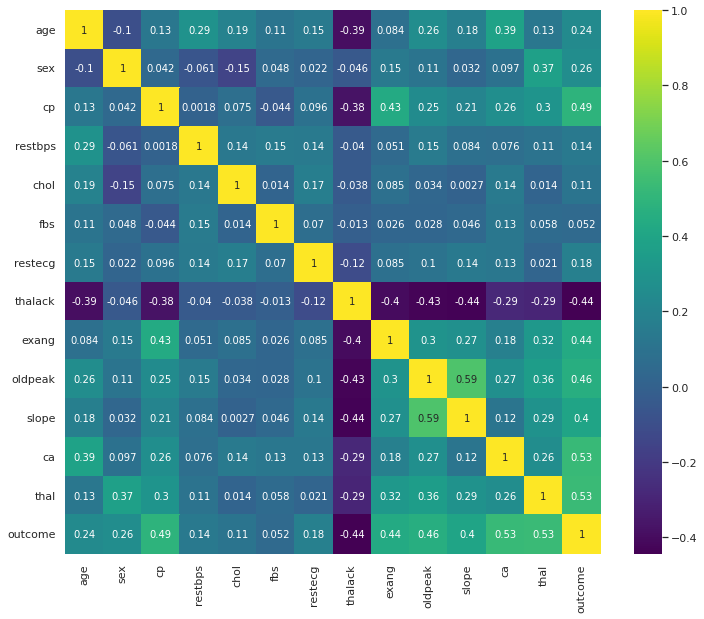

In [12]:
plt.figure(figsize = (12,10))
corr = df_corr.corr(method = 'spearman')
sns.heatmap(corr, annot = True, cmap = 'viridis')

In [13]:
c = df_corr.corr(method = 'spearman')
s = c.unstack()
so = pd.DataFrame(s.sort_values(kind="quicksort"))
display(so)

0
thalack outcome -0.443944
outcome thalack -0.443944
slope   thalack -0.435766
thalack slope   -0.435766
        oldpeak -0.431510
...                   ...
restbps restbps  1.000000
cp      cp       1.000000
sex     sex      1.000000
thal    thal     1.000000
outcome outcome  1.000000

[196 rows x 1 columns]

We should observe the relationship between the outcome and other variables directly (categorical vs categorical and numerical vs numerical), after assessing other relationships.


* slope	outcome	0.40030234220771915
* exang	outcome	0.43525477533153456
* oldpeak	outcome	0.46303189285050217
* cp	outcome	0.4869334788835544
* ca	outcome	0.5309391744043568
* thal	outcome	0.53489118339737

##Pairplot

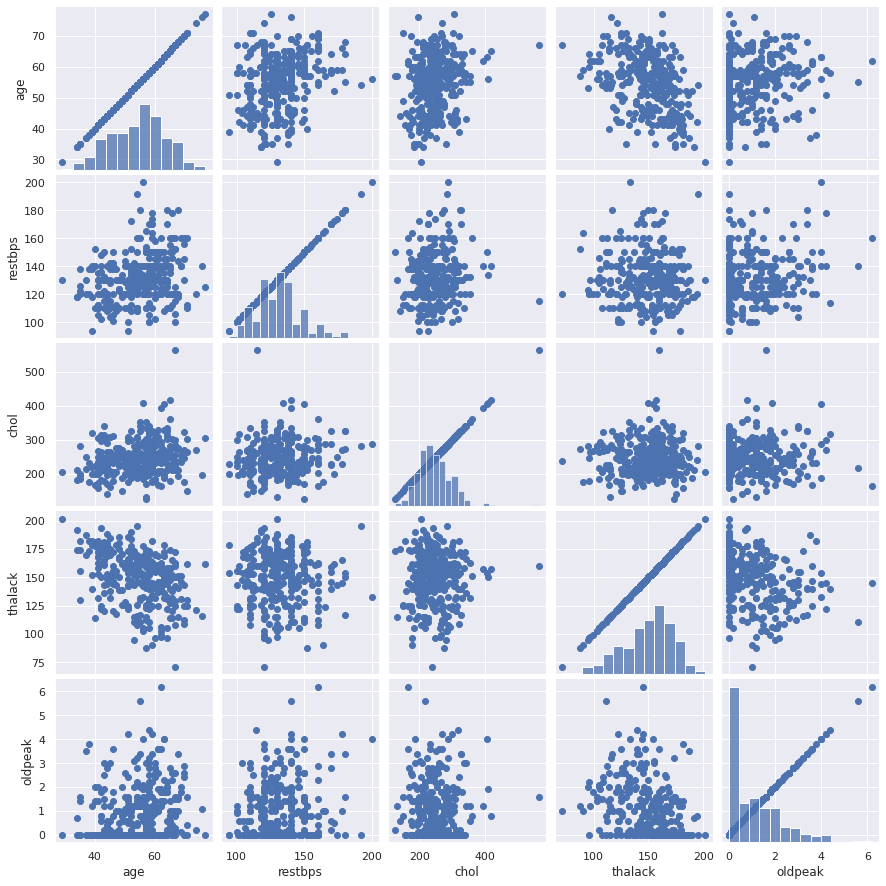

In [15]:
pair_grid = df_corr[['age', 'restbps', 'chol', 'thalack', 'oldpeak']]
g = sns.pairplot(pair_grid)
g.map(plt.scatter);

#Numerical Variables

##Age vs other variables

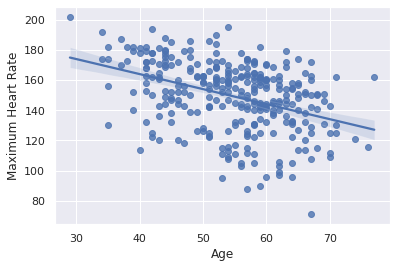

In [21]:
sns.regplot(data = df, x = 'Age', y = 'Maximum Heart Rate')

We can observe through the graph that there is a relationship between thalack and age, where as the age increases thalack decreases (maximum heart rate achieved). We should also assess the impact of the maximum heart rate achieved on the outcome.

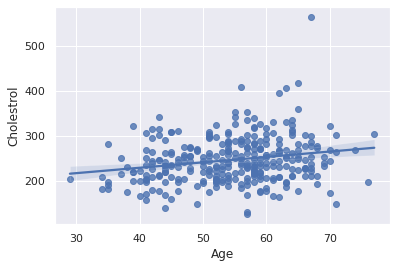

In [22]:
sns.regplot(data = df, x = 'Age', y = 'Cholestrol')

We can observe a mild positive correlation between the age and cholesterol levels, where as the age increases the cholesterol level slightly increases, we should also observe the impact of cholesterol levels on the outcome.

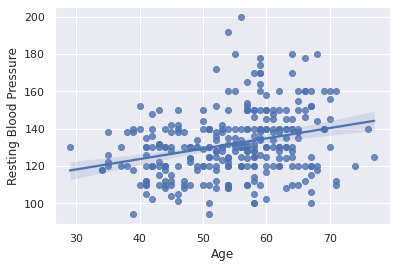

In [24]:
sns.regplot(data = df, x = 'Age', y = 'Resting Blood Pressure')

We can observe that there is a small correlation between the age and the resting blood pressure, which is also obvious. We should assess the impact of resting blood pressure on the outcome.

#Correlation between outcome and other variables

##Thalassemia and outcome

Since thalassemia and outcome are correlated (0.54), we should investigate the impact of thalassemia on the outcome

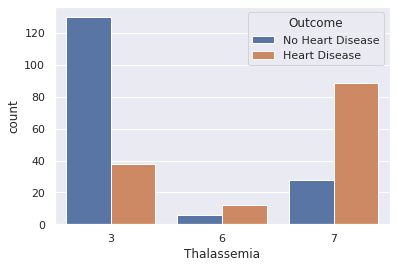

In [49]:
sns.countplot(data = df, x = 'Thalassemia', hue = 'Outcome')

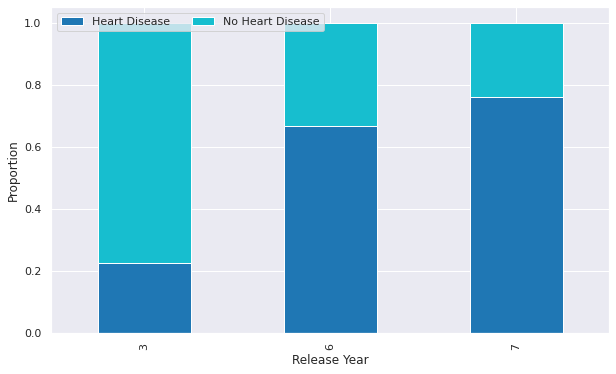

Outcome,Heart Disease,No Heart Disease
Thalassemia,,
3,0.226190,0.773810
6,0.666667,0.333333
7,0.760684,0.239316


In [63]:
cross_tab_prop = pd.crosstab(index=df['Thalassemia'],
                             columns=df['Outcome'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")

cross_tab = pd.crosstab(index=df['Thalassemia'],
                        columns=df['Outcome'])
plt.show()
display(cross_tab_prop)

We can see that most of the people with 'reversable defect' thalassemia have a heart disease (76%), on the other hand most people with 'normal' thalassemia do not have a heart disease (77%). Therefore, we can conclude that 'reversable defect thalassemia' has a high impact on heart diseases and should be factor to consider.

As for 'fixed defect' thalassemia, the percentage bar plot shows that it has a high impact, however the sample size of the data can be considered insufficient compared to 'normal' and 'reversable defect' thalassemia.

Ask client about the impact of thalassemia on heart diseases, in addition to the meaning of reversable defect and fixed defect.